# Спектры поглощения йода

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
from scipy.stats import linregress

In [3]:
def get_spectrum(filename): # Функция для считывания в dataframe csv файла с данными.
    import re
    df = pd.read_csv(filename, sep=' ').iloc[:,:2].copy()
    df = df.rename(index=str, columns={'Wavelength': 'Wavelength, nm', 'Trans': 'Transmittance, %'})
    df = df.iloc[1:,:].copy()
    df = df.astype('str', copy=True)
    df = df.apply(lambda s: [i.replace(',', '.') for i in s])
    df = df.astype('float', copy=True)
    return df.copy()

In [4]:
df40 = get_spectrum('40C_slot0_1nm.dat') # Считывание спектра поглощения для T = 40deg
df40.head()

,"Wavelength, nm","Transmittance, %"
1,480.0,112.407386
2,480.2,92.745875
3,480.4,52.943947
4,480.6,53.237638
5,480.8,53.130678


In [5]:
df55 = get_spectrum('55C_slot0_1nm.dat') # Считывание спектра поглощения для T = 55deg
df55.head()

,"Wavelength, nm","Transmittance, %"
1,480.0,48.219076
2,480.2,47.841413
3,480.4,47.984197
4,480.6,47.875271
5,480.8,47.761020


In [6]:
df70 = get_spectrum('70C_slot0_1nm.dat') # Считывание спектра поглощения для T = 70deg
df70.head()

,"Wavelength, nm","Transmittance, %"
1,480.0,36.954217
2,480.2,36.792441
3,480.4,36.721716
4,480.6,36.707068
5,480.8,36.530801


Найдем пики для $40^\circ C$, $55^\circ C$, $70^\circ C$

In [7]:
import matplotlib as mpl
'''
font = {'family' : 'normal',
        'weight' : 'normal',
        'size' : 20}

mpl.rc('font', **font)

'''

"\nfont = {'family' : 'normal',\n        'weight' : 'normal',\n        'size' : 20}\n\nmpl.rc('font', **font)\n\n"

####  Спектр при темпиратуре 40

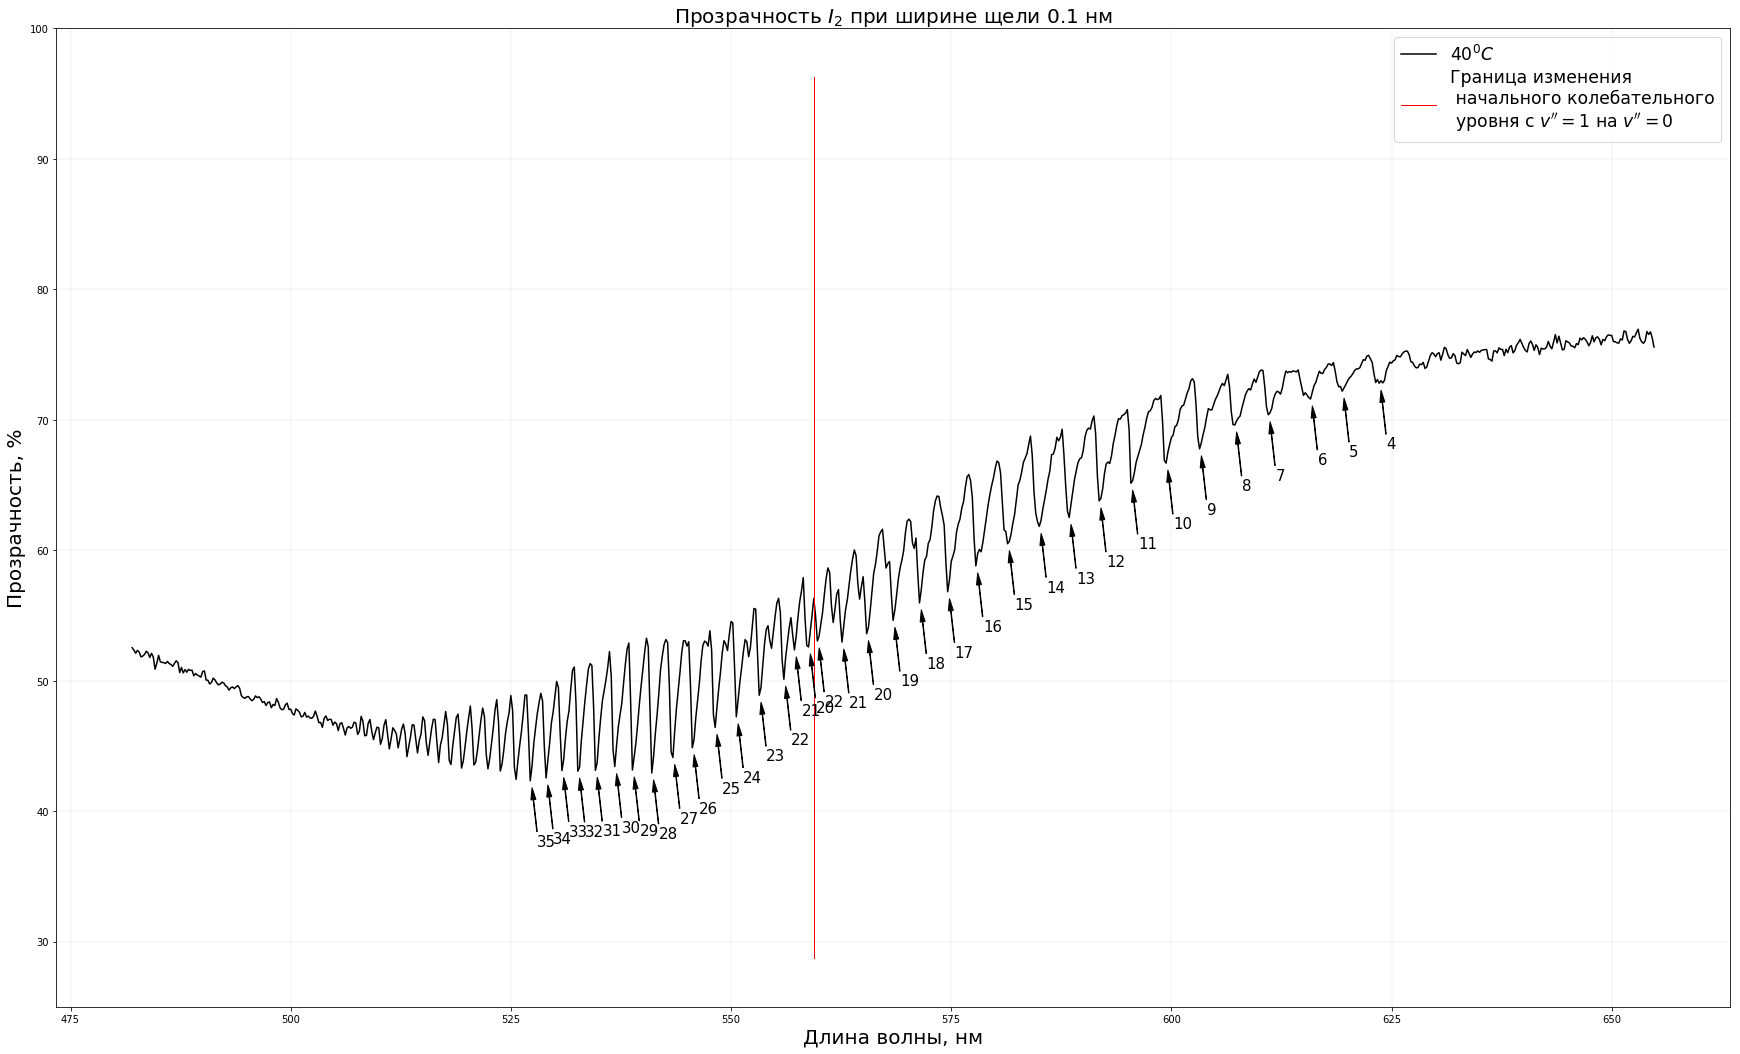

In [8]:


from scipy.signal import find_peaks
peaks, _ = find_peaks(-df40.iloc[:,1], distance = 4.5, width=0.6, prominence=1.6)


# Удалим физически плохие пики.
peaks = np.delete(peaks, -19)
peaks = np.delete(peaks, 0)
peaks = np.delete(peaks, 24)
peaks.sort()
peaks = peaks[10:].copy()

fig = plt.figure()
ax = plt.subplot(111)
df40[10:][:].plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='40$^0C$', c='black')
ax.set_xlabel('Длина волны, нм', size=20)
ax.set_ylabel('Прозрачность, %', size=20)
ax.set_title("Прозрачность $I_2$ при ширине щели $0.1$ нм", size=20)
ax.axvline(x=559.4, linewidth=1, ymin=0.05, ymax=0.95, linestyle='-', color='r', label='Граница изменения \n начального колебательного\n уровня c $v^{\prime\prime}=1$ на $v^{\prime\prime}=0$')



# Добавление сетки на график
"""
xminorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(1)
xmajorLocator = MultipleLocator(10)
ymajorLocator = MultipleLocator(5)

ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
ax.xaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_locator(ymajorLocator)
"""
ax.set_ylim(25,100)

plt.grid(which='major', ls='-', lw=0.1, c='grey')
plt.grid(which='minor', ls='--', lw=0.05, c='grey')
ax.legend(fontsize='xx-large')

j = 4
p = 0
peaks_len = len(peaks)
for i in range(1, peaks_len):
    if j>22 and p==0: 
        j = 20
        p = 1
    #print('{}: {}'.format(j, peaks_len - i))
    ax.annotate('%d'%j, xy=(df40.iloc[peaks[peaks_len-i],0]+.2, df40.iloc[peaks[peaks_len-i],1]-.5), 
                xytext=(df40.iloc[peaks[peaks_len-i],0]+0.8, df40.iloc[peaks[peaks_len-i],1]-5), size=15, 
                arrowprops=dict(facecolor='black', shrink=0.01, width=0.5, headwidth=5))
    j+=1

fig.set_size_inches(30, 18)
fig.savefig('40_grad.pdf', bbox_inches='tight', pad_inches=0)








#### Спектр при темпиратуре 55

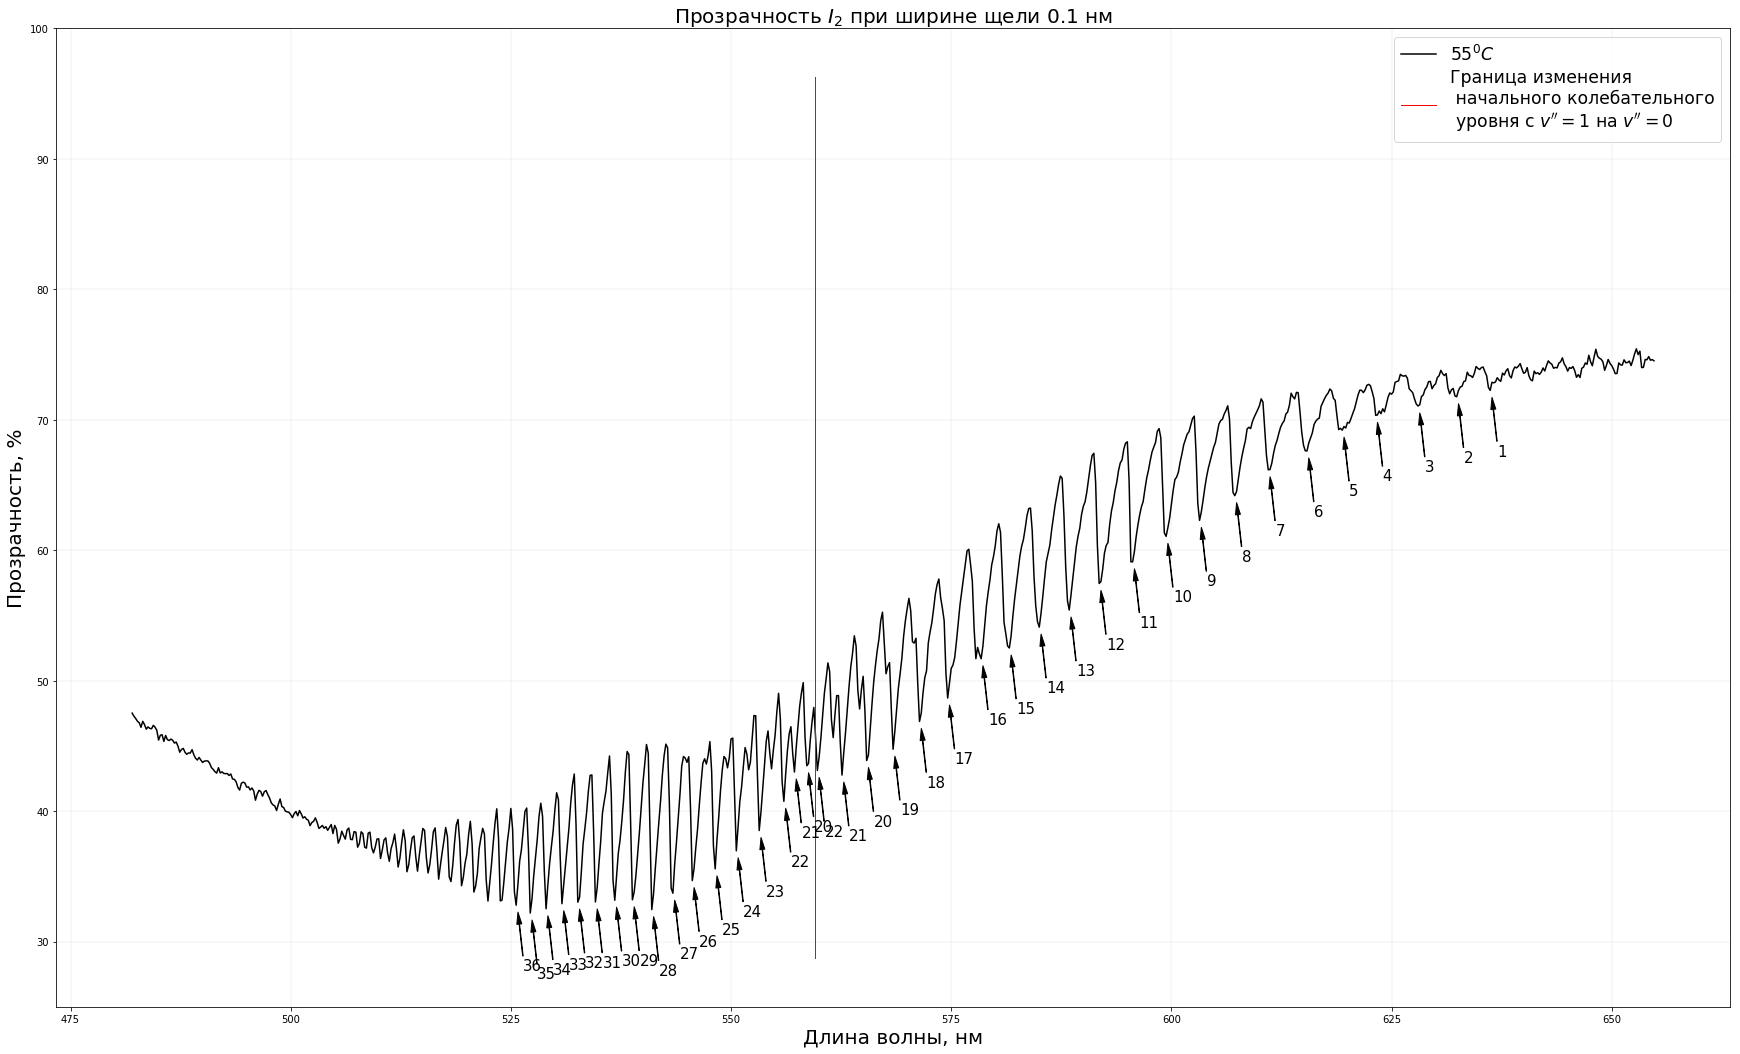

In [9]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(-df55.iloc[:,1], distance=4.5, width=0.4, prominence=1.8)


peaks.sort()
peaks = peaks[10:].copy()

# Удалим плохие пики. 
peaks = np.delete(peaks,-1)
peaks = np.delete(peaks,-22)
peaks = np.delete(peaks,15)

peaks.sort()

fig = plt.figure()
ax = plt.subplot(111)
df55[10:][:].plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='55$^0C$', c='black')
ax.set_xlabel('Длина волны, нм', size=20)
ax.set_ylabel('Прозрачность, %', size=20)
ax.set_title("Прозрачность $I_2$ при ширине щели $0.1$ нм", size=20)
ax.axvline(x=559.5, linewidth=1, ymin=0.05, ymax=0.95, linestyle='-', color='r', label='Граница изменения \n начального колебательного\n уровня c $v^{\prime\prime}=1$ на $v^{\prime\prime}=0$')


ax.set_ylim(25,100)
plt.grid(which='major', ls='-', lw=0.1, c='grey')
plt.grid(which='minor', ls='--', lw=0.05, c='grey')
ax.legend(fontsize='xx-large')
j = 1
p = 0
peaks_len = len(peaks)
for i in range(1, peaks_len):
    if j>22 and p==0: 
        j = 20
        p = 1
 
    ax.annotate('%d'%j, xy=(df55.iloc[peaks[peaks_len-i],0]+.2, df55.iloc[peaks[peaks_len-i],1]-.5), 
                xytext=(df55.iloc[peaks[peaks_len-i],0]+0.8, df55.iloc[peaks[peaks_len-i],1]-5), size=15, 
                arrowprops=dict(facecolor='black', shrink=0.01, width=0.5, headwidth=5))
    j+=1

fig.set_size_inches(30, 18)
fig.savefig('55_grad.pdf', bbox_inches='tight', pad_inches=0)



In [10]:
#df55.iloc[:,1][df55.iloc[:,0] > 623]

#### Спектр при темпиратуре 70

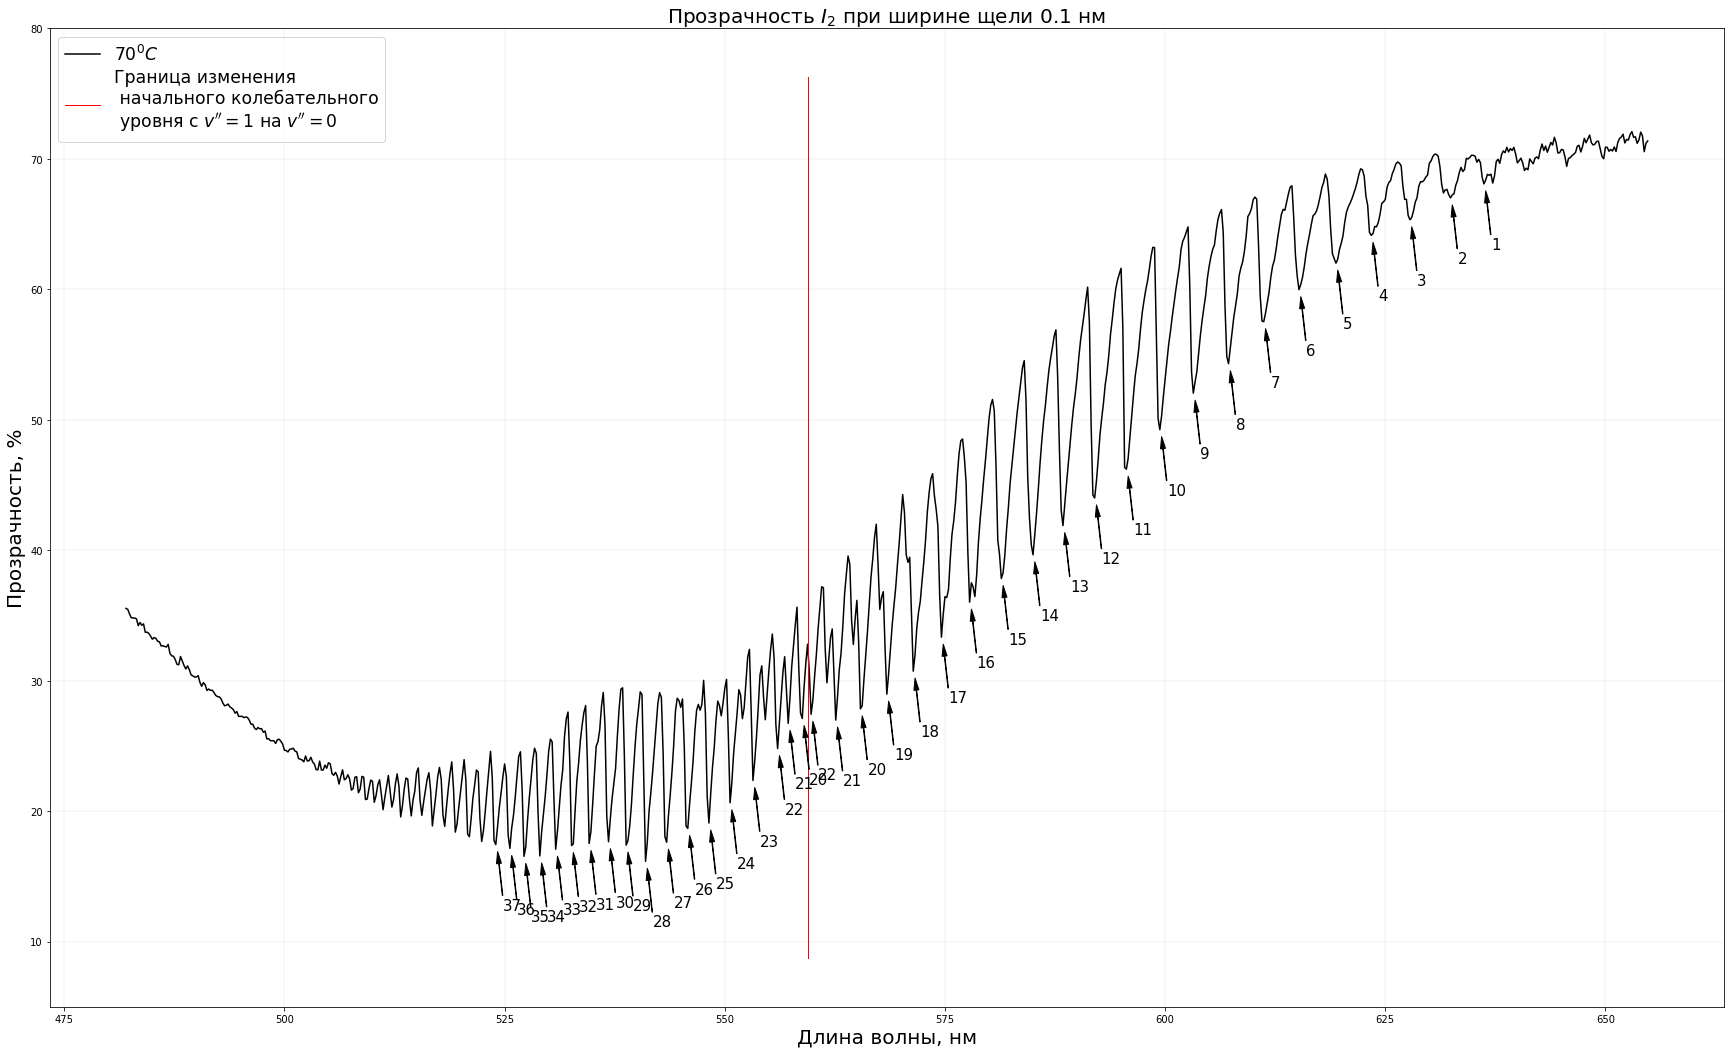

In [11]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(-df70.iloc[:,1], distance=4.5, width=0.4, prominence=1.6)

# удаляем плохие пики
peaks = np.delete(peaks,-25)
peaks = np.delete(peaks,-1)
peaks = np.delete(peaks,-1)
peaks = np.delete(peaks,-1)
peaks = np.delete(peaks,-28)
peaks = np.delete(peaks,-26)

peaks.sort()
peaks = peaks[10:].copy()


fig = plt.figure()
ax = plt.subplot(111)
#df40.plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='40$^0C$')
#df55.plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='55$^0C$')
df70[10:][:].plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='70$^0C$', c='black')
ax.set_xlabel('Длина волны, нм', size=20)
ax.set_ylabel('Прозрачность, %', size=20)
ax.set_title("Прозрачность $I_2$ при ширине щели $0.1$ нм", size=20)
ax.axvline(x=559.5, linewidth=1, ymin=0.05, ymax=0.95, linestyle='-', color='r', label='Граница изменения \n начального колебательного\n уровня c $v^{\prime\prime}=1$ на $v^{\prime\prime}=0$')


ax.set_ylim(5,80)
plt.grid(which='major', ls='-', lw=0.1, c='grey')
plt.grid(which='minor', ls='--', lw=0.05, c='grey')
ax.legend(fontsize='xx-large')
j = 1
p = 0
peaks_len = len(peaks)
for i in range(1, peaks_len):
    if j>22 and p==0: 
        j = 20
        p = 1
   
    ax.annotate('%d'%j, xy=(df70.iloc[peaks[peaks_len-i],0]+.2, df70.iloc[peaks[peaks_len-i],1]-.5), 
                xytext=(df70.iloc[peaks[peaks_len-i],0]+0.8, df70.iloc[peaks[peaks_len-i],1]-5), size=15, 
                arrowprops=dict(facecolor='black', shrink=0.01, width=0.5, headwidth=5))
    j+=1

fig.set_size_inches(30, 18)
fig.savefig('70_grad.pdf', bbox_inches='tight', pad_inches=0)



In [12]:
'''from scipy.signal import find_peaks
peaks, _ = find_peaks(-df70.iloc[:,1][:790], distance=5.5, width=0.4, prominence=1.6)
# Костыль 1
peaks = np.append(peaks,395)
# Костыль 2
peaks = np.append(peaks,387)
peaks.sort()
peaks = peaks[10:].copy()
# Удалим плохие пики. ХАРДКОД
peaks = np.delete(np.delete(peaks, 20), 18)
#peaks = np.extract(peaks!=387, peaks)
peaks'''

'from scipy.signal import find_peaks\npeaks, _ = find_peaks(-df70.iloc[:,1][:790], distance=5.5, width=0.4, prominence=1.6)\n# Костыль 1\npeaks = np.append(peaks,395)\n# Костыль 2\npeaks = np.append(peaks,387)\npeaks.sort()\npeaks = peaks[10:].copy()\n# Удалим плохие пики. ХАРДКОД\npeaks = np.delete(np.delete(peaks, 20), 18)\n#peaks = np.extract(peaks!=387, peaks)\npeaks'

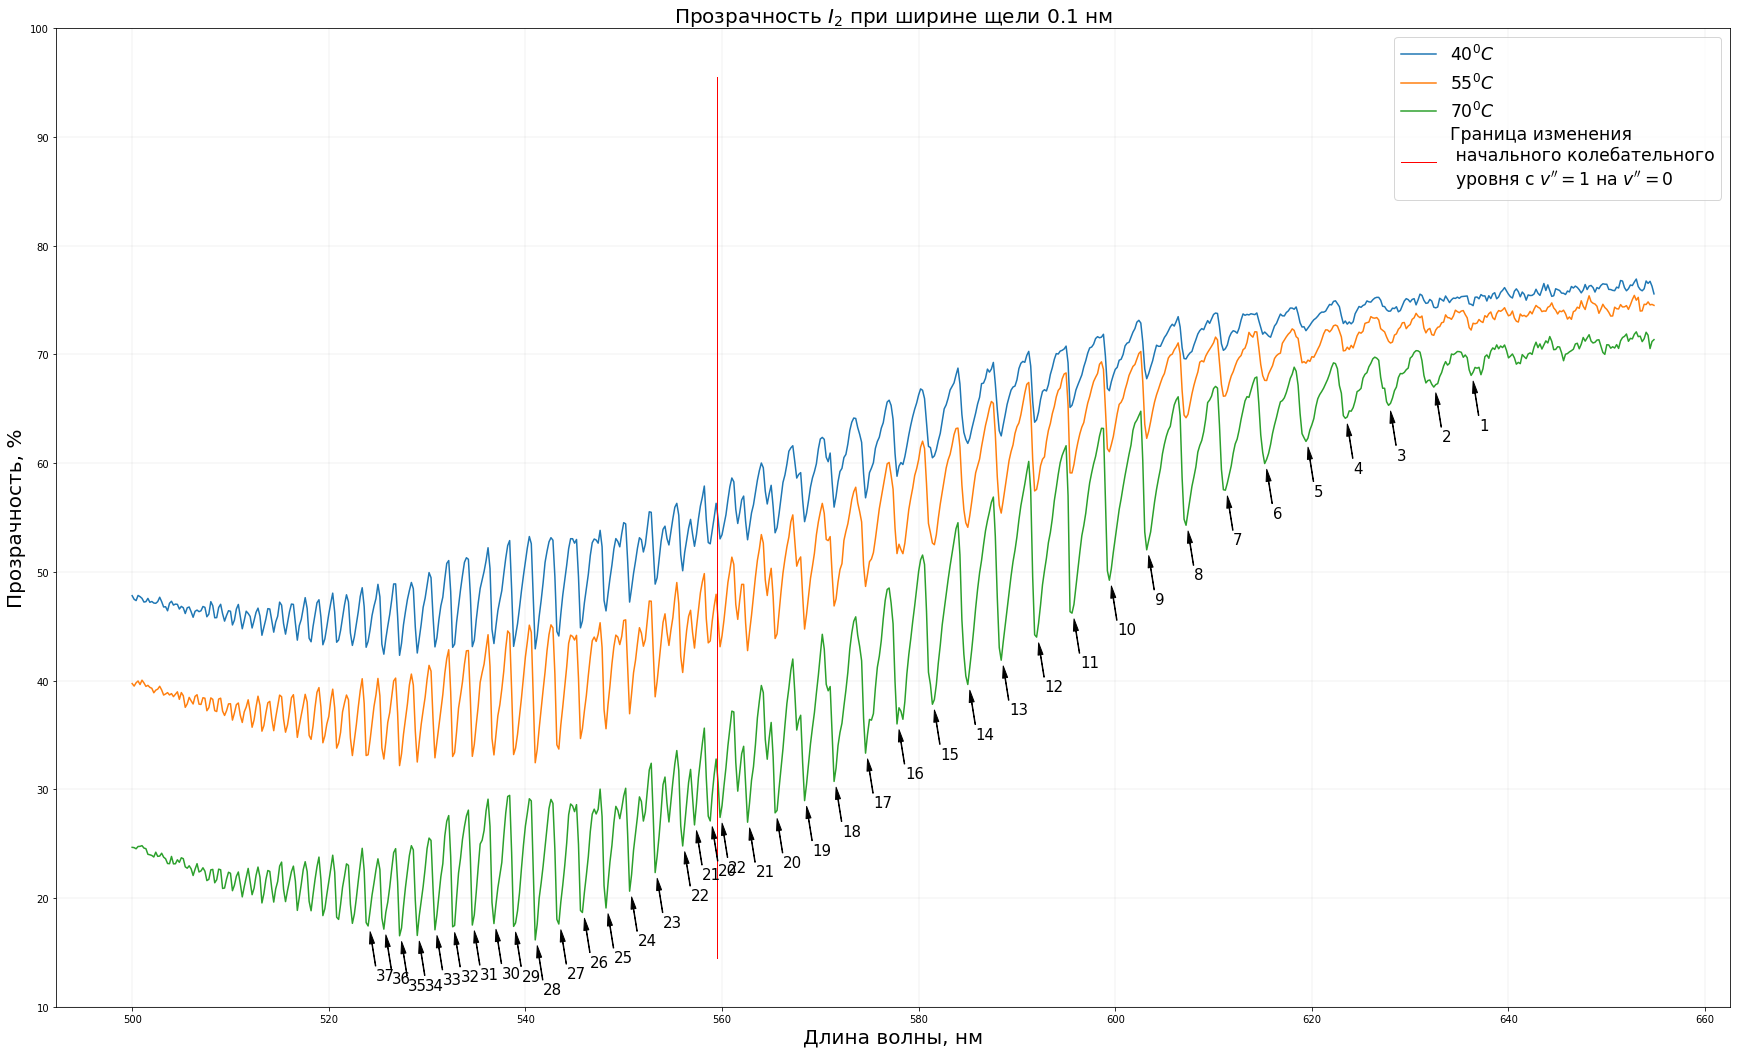

In [13]:
fig = plt.figure()
ax = plt.subplot(111)
df40[100:][:].plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='40$^0C$')
df55[100:][:].plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='55$^0C$')
df70[100:][:].plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='70$^0C$')
ax.set_xlabel('Длина волны, нм', size=20)
ax.set_ylabel('Прозрачность, %', size=20)
ax.set_title("Прозрачность $I_2$ при ширине щели $0.1$ нм", size=20)
ax.axvline(x=559.5, linewidth=1, ymin=0.05, ymax=0.95, linestyle='-', color='r', label='Граница изменения \n начального колебательного\n уровня c $v^{\prime\prime}=1$ на $v^{\prime\prime}=0$')


ax.set_ylim(10,100)
plt.grid(which='major', ls='-', lw=0.1, c='grey')
plt.grid(which='minor', ls='--', lw=0.05, c='grey')
ax.legend(fontsize='xx-large')
j = 1
p = 0
peaks_len = len(peaks)
for i in range(1, peaks_len):
    if j>22 and p==0: 
        j = 20
        p = 1
    #print("{}: {}".format(j, peaks_len-i))
    ax.annotate('%d'%j, xy=(df70.iloc[peaks[peaks_len-i],0]+.2, df70.iloc[peaks[peaks_len-i],1]-.5), 
                xytext=(df70.iloc[peaks[peaks_len-i],0]+0.8, df70.iloc[peaks[peaks_len-i],1]-5), size=15, 
                arrowprops=dict(facecolor='black', shrink=0.01, width=0.5, headwidth=5))
    j+=1

fig.set_size_inches(30, 18)
fig.savefig('main_spectrum.pdf', bbox_inches='tight', pad_inches=0)

In [14]:
peaks_idxs_from0 = np.extract(peaks < 382, peaks) # Переходы с 0 колебательного уровня
peaks_idxs_from0 

array([212, 220, 228, 236, 245, 254, 263, 273, 284, 294, 305, 317, 329,
       341, 353, 366, 380])

In [15]:
peaks_idxs_from1 = np.extract(peaks > 382, peaks) # Переходы с 1 колебательного уровня
peaks_idxs_from1

array([386, 394, 399, 413, 427, 442, 457, 473, 489, 507, 525, 542, 560,
       578, 597, 616, 636, 656, 676, 697, 717, 739, 762, 781])

In [16]:
print(df70.iloc[peaks_idxs_from0[1:],0].as_matrix()) # Так можно выбрать длины волн соответствующие пикам
print(df70.iloc[peaks_idxs_from0[:-1],0].as_matrix())

[524.  525.6 527.2 529.  530.8 532.6 534.6 536.8 538.8 541.  543.4 545.8
 548.2 550.6 553.2 556. ]
[522.4 524.  525.6 527.2 529.  530.8 532.6 534.6 536.8 538.8 541.  543.4
 545.8 548.2 550.6 553.2]


In [17]:
print(df70.iloc[peaks_idxs_from0[1:],0].as_matrix()**(-1)) # Так получаем частоты из длин волн 

[0.0019084  0.00190259 0.00189681 0.00189036 0.00188395 0.00187758
 0.00187056 0.00186289 0.00185598 0.00184843 0.00184026 0.00183217
 0.00182415 0.0018162  0.00180766 0.00179856]


In [18]:
nu = df70.iloc[peaks_idxs_from1[:],0].as_matrix()**(-1)
nu = nu*10**7
np.flip(nu) 

array([15718.32756995, 15812.77672359, 15928.63969417, 16041.06512672,
       16144.65611882, 16254.87646294, 16361.2565445 , 16469.03820817,
       16578.24933687, 16683.35001668, 16789.79180658, 16891.89189189,
       16995.24133243, 17094.01709402, 17199.8624011 , 17307.02665282,
       17403.41106857, 17500.87504375, 17593.24419423, 17686.59356208,
       17774.61784572, 17863.52268667, 17895.49033643, 17946.87724336])

In [19]:
jump0 = (df70.iloc[peaks_idxs_from0[1:],0].as_matrix())**(-1) - (df70.iloc[peaks_idxs_from0[:-1],0].as_matrix())**(-1)
jump0 = (-np.flip(jump0)*10**7)[:-1]
jump0 # Разница соседних волновых чисел для перехода с 0 колебательного уровня.

array([91.0334639 , 85.36011067, 79.51260891, 80.211877  , 80.92041033,
       81.6383733 , 75.47408014, 69.14963649, 76.66218959, 70.2424869 ,
       63.67081791, 64.10411648, 64.54185324, 57.7416546 , 58.09427539])

In [20]:
v__ = np.array([i + 20 for i in range(len(jump0))]) + 1
v__ # 

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35])

In [21]:
slope, intercept, r_value, p_value, std_err = linregress(v__, jump0)
print("slope: %f    intercept: %f" % (slope, intercept))

slope: -2.174723    intercept: 134.116095


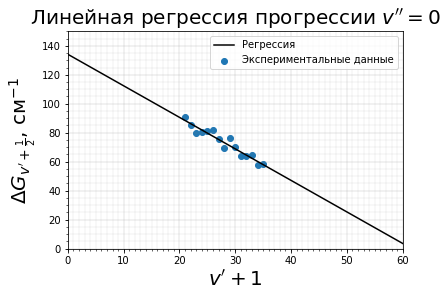

In [22]:
plt.scatter(v__, jump0, label='Экспериментальные данные')
plt.ylabel(r'$\Delta G_{v^{\prime}+\frac{1}{2}}$, см$^{-1}$', size=20)
plt.xlabel(r'$v^{\prime}+1$', size=20)
x_lim = (0, 60)
x = np.linspace(*x_lim, 500)
y = slope*x+intercept

plt.plot(x, y, label='Регрессия', c='black')
plt.title(r'Линейная регрессия прогрессии $v^{\prime\prime}=0$', size=20)

xminorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(5)
plt.gca().xaxis.set_minor_locator(xminorLocator)
plt.gca().yaxis.set_minor_locator(yminorLocator)
plt.grid(which='major', c='grey', lw=0.1)
plt.grid(which='minor', c='grey', lw=0.1)

plt.legend()
plt.xlim(x_lim)
plt.ylim(0,150)
plt.rcParams["figure.figsize"] = [10,5]
plt.savefig('deltaG(v_0).pdf', bbox_inches='tight', pad_inches=0)

In [23]:
jump1 = (df70.iloc[peaks_idxs_from1[1:],0].as_matrix())**(-1)-(df70.iloc[peaks_idxs_from1[:-1],0].as_matrix())**(-1)
jump1 = (-np.flip(jump1)*10**7)[:-1]
jump1

array([ 94.44915365, 115.86297058, 112.42543255, 103.5909921 ,
       110.22034411, 106.38008156, 107.78166367, 109.2111287 ,
       105.10067981, 106.4417899 , 102.10008531, 103.34944054,
        98.77576159, 105.84530708, 107.16425172,  96.38441575,
        97.46397518,  92.36915048,  93.34936785,  88.02428364,
        88.90484096,  31.96764976])

In [24]:
# Костыль. Выкинем два последних значения
jump1 = jump1[:-1]

In [25]:
v_ = np.array([i+1 for i in range(len(jump1))])+1
v_

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22])

In [26]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(v_, jump1)
print("slope: %f    intercept: %f" % (slope, intercept))

slope: -0.898673    intercept: 112.936230


In [27]:
np.corrcoef(v__, jump0)

array([[ 1.        , -0.95774074],
       [-0.95774074,  1.        ]])

In [28]:
np.corrcoef(v_, jump1)

array([[ 1.        , -0.71938096],
       [-0.71938096,  1.        ]])

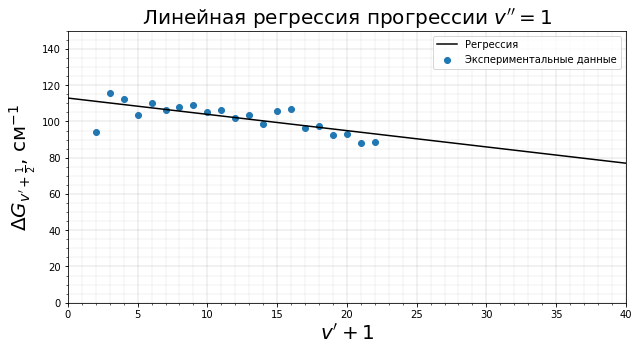

In [29]:
plt.scatter(v_, jump1, label='Экспериментальные данные')
plt.ylabel(r'$\Delta G_{v^{\prime}+\frac{1}{2}}$, см$^{-1}$', size=20)
plt.xlabel(r'$v^{\prime}+1$', size=20)
x = np.linspace(0, 40, 500)
y = slope*x+intercept
plt.plot(x, y, label='Регрессия', c='black')
plt.title(r'Линейная регрессия прогрессии $v^{\prime\prime}=1$', size=20)

xminorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(5)
plt.gca().xaxis.set_minor_locator(xminorLocator)
plt.gca().yaxis.set_minor_locator(yminorLocator)
plt.grid(which='major', c='grey', lw=0.1)
plt.grid(which='minor', c='grey', lw=0.1)

plt.legend()
plt.xlim(0,40)
plt.ylim(0,150)
plt.rcParams["figure.figsize"] = [10,5]
plt.savefig('deltaG(v_1).pdf', bbox_inches='tight', pad_inches=0)

In [30]:
nu_1 = (df70.iloc[peaks_idxs_from1,0].as_matrix())**(-1)*10**7
nu_1 = np.flip(nu_1)+1.5*130
nu_1

array([15913.32756995, 16007.77672359, 16123.63969417, 16236.06512672,
       16339.65611882, 16449.87646294, 16556.2565445 , 16664.03820817,
       16773.24933687, 16878.35001668, 16984.79180658, 17086.89189189,
       17190.24133243, 17289.01709402, 17394.8624011 , 17502.02665282,
       17598.41106857, 17695.87504375, 17788.24419423, 17881.59356208,
       17969.61784572, 18058.52268667, 18090.49033643, 18141.87724336])

In [31]:
v_ = np.array([i+1/2 for i in range(len(nu_1))])+1
v_

array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5,
       12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5,
       23.5, 24.5])

In [32]:
degs = np.polyfit(v_, nu_1, deg=2)
degs

array([-7.89896546e-01,  1.21145932e+02,  1.57053904e+04])

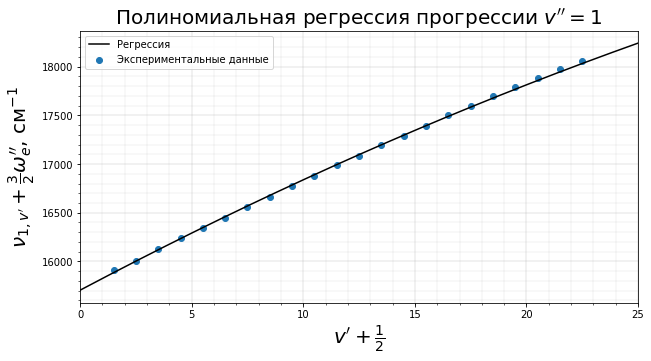

In [33]:
# Хе-хе, выкинем две последние точки при построении
nu_1 = nu_1[:-2]
v_ = v_[:-2]

plt.scatter(v_, nu_1, label='Экспериментальные данные')
plt.ylabel(r'$\nu_{1,v^{\prime}}+\frac{3}{2}\omega_e^{\prime\prime}}$, см$^{-1}$', size=20)
plt.xlabel(r'$v^{\prime}+\frac{1}{2}$', size=20)
x = np.linspace(0, 25, 500)
y = degs[0]*x**2+degs[1]*x+degs[2]
plt.plot(x, y, label='Регрессия', c='black')
plt.title(r'Полиномиальная регрессия прогрессии $v^{\prime\prime}=1$', size=20)

xminorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(100)
plt.gca().xaxis.set_minor_locator(xminorLocator)
plt.gca().yaxis.set_minor_locator(yminorLocator)
plt.grid(which='major', c='grey', lw=0.1)
plt.grid(which='minor', c='grey', lw=0.1)

plt.legend()
plt.xlim(0,25)
plt.rcParams["figure.figsize"] = [15,10]
plt.savefig('parabola_half_1.pdf', bbox_inches='tight', pad_inches=0)

In [34]:
nu_0 = (df70.iloc[peaks_idxs_from0,0].as_matrix())**(-1)*10**7
nu_0 = np.flip(nu_0)+0.5*130
nu_0

array([18050.61151079, 18141.64497469, 18227.00508536, 18306.51769427,
       18386.72957127, 18467.6499816 , 18549.2883549 , 18624.76243504,
       18693.91207153, 18770.57426113, 18840.81674803, 18904.48756594,
       18968.59168242, 19033.13353566, 19090.87519026, 19148.96946565,
       19207.41960184])

In [35]:
v__ = np.array([i+20+1/2 for i in range(len(nu_0))])
v__

array([20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5,
       31.5, 32.5, 33.5, 34.5, 35.5, 36.5])

In [36]:
degs = np.polyfit(v__, nu_0, deg=2)
degs

array([-1.06199032e+00,  1.32810080e+02,  1.57743545e+04])

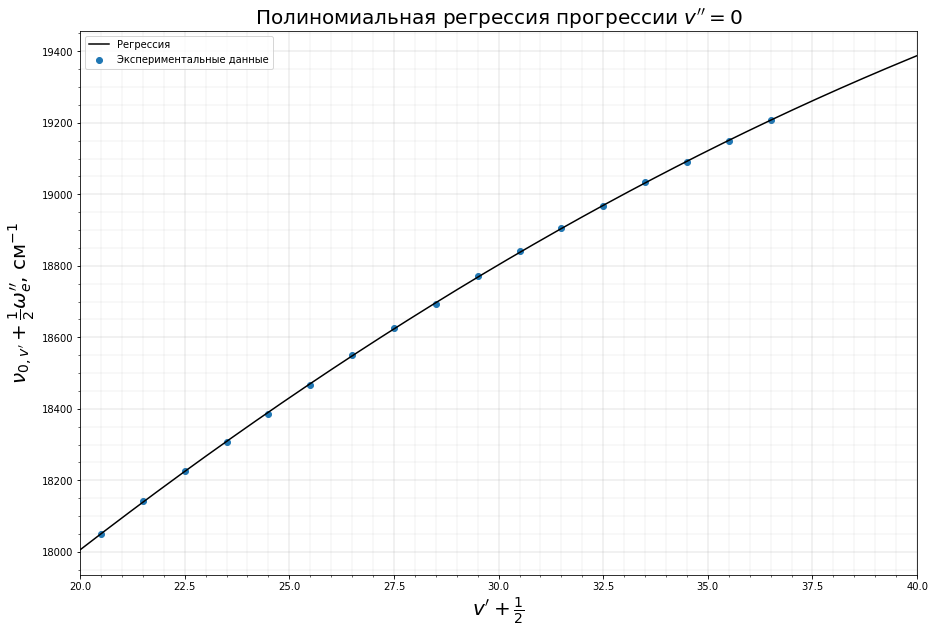

In [37]:
plt.scatter(v__, nu_0, label='Экспериментальные данные')
plt.ylabel(r'$\nu_{0,v^{\prime}}+\frac{1}{2}\omega_e^{\prime\prime}}$, см$^{-1}$', size=20)
plt.xlabel(r'$v^{\prime}+\frac{1}{2}$', size=20)
x = np.linspace(20, 40, 500)
y = degs[0]*x**2+degs[1]*x+degs[2]
plt.plot(x, y, label='Регрессия', c='black')
plt.title(r'Полиномиальная регрессия прогрессии $v^{\prime\prime}=0$', size=20)

xminorLocator = MultipleLocator(0.5)
yminorLocator = MultipleLocator(50)
plt.gca().xaxis.set_minor_locator(xminorLocator)
plt.gca().yaxis.set_minor_locator(yminorLocator)
plt.grid(which='major', c='grey', lw=0.1)
plt.grid(which='minor', c='grey', lw=0.1)

plt.legend()
plt.xlim(20,40)
plt.rcParams["figure.figsize"] = [10,5]
plt.savefig('parabola_half_0.pdf', bbox_inches='tight', pad_inches=0)

In [38]:
dnu = nu_0[1:]-nu_0[:-1]
dnu = dnu[:-1].copy()
dnu

array([91.0334639 , 85.36011067, 79.51260891, 80.211877  , 80.92041033,
       81.6383733 , 75.47408014, 69.14963649, 76.66218959, 70.2424869 ,
       63.67081791, 64.10411648, 64.54185324, 57.7416546 , 58.09427539])

In [39]:
degs = np.polyfit(dnu, nu_0[:-2], deg=2)
degs

array([-1.38018328e-01, -1.12127679e+01,  2.01781167e+04])

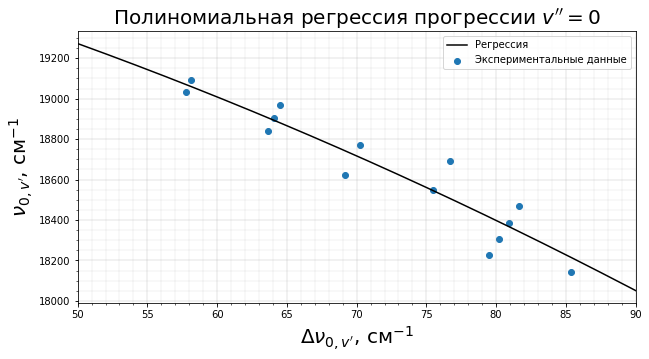

In [40]:
plt.scatter(dnu, nu_0[:-2], label='Экспериментальные данные')
plt.ylabel(r'$\nu_{0,v^{\prime}}$, см$^{-1}$', size=20)
plt.xlabel(r'$\Delta\nu_{0,v^{\prime}}$, см$^{-1}$', size=20)
x = np.linspace(50, 90, 500)
y = degs[0]*x**2+degs[1]*x+degs[2]
plt.plot(x, y, label='Регрессия', c='black')
plt.title(r'Полиномиальная регрессия прогрессии $v^{\prime\prime}=0$', size=20)

xminorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(50)
plt.gca().xaxis.set_minor_locator(xminorLocator)
plt.gca().yaxis.set_minor_locator(yminorLocator)
plt.grid(which='major', c='grey', lw=0.1)
plt.grid(which='minor', c='grey', lw=0.1)

plt.legend()
plt.xlim(50, 90)
plt.rcParams["figure.figsize"] = [15,10]
plt.savefig('delta_nu.pdf', bbox_inches='tight', pad_inches=0)

In [41]:
jump0 = (df70.iloc[peaks_idxs_from0[1:],0].as_matrix())**(-1)-(df70.iloc[peaks_idxs_from0[:-1],0].as_matrix())**(-1)
jump0 = (-np.flip(jump0)*10**7)[:-1]
jump0

array([91.0334639 , 85.36011067, 79.51260891, 80.211877  , 80.92041033,
       81.6383733 , 75.47408014, 69.14963649, 76.66218959, 70.2424869 ,
       63.67081791, 64.10411648, 64.54185324, 57.7416546 , 58.09427539])

In [42]:
v__ = np.array([i+20 for i in range(len(jump0))])+1/2
v__

array([20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5,
       31.5, 32.5, 33.5, 34.5])

In [43]:
degs = np.polyfit(v__, jump0, deg=2)
degs

array([-1.75406032e-02, -1.20998939e+00,  1.20091078e+02])

In [44]:
import scipy

In [45]:
results = scipy.integrate.quad(lambda x: degs[0]*x**2+degs[1]*x+degs[2], 0, 59.2)
results

(3776.0261309881507, 4.247815576928968e-11)

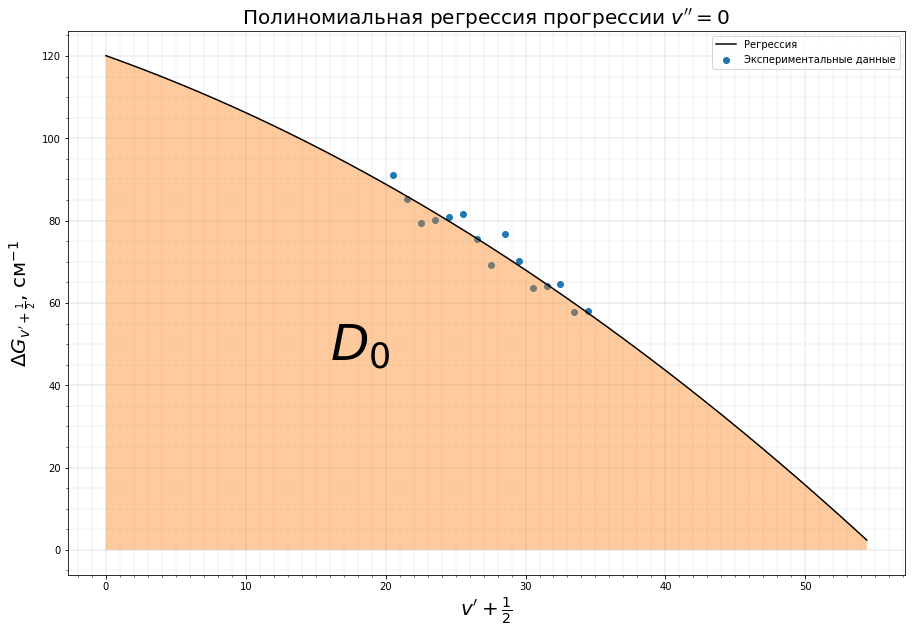

In [46]:
plt.scatter(v__, jump0, label='Экспериментальные данные')
plt.ylabel(r'$\Delta G_{v^{\prime}+\frac{1}{2}}$, см$^{-1}$', size=20)
plt.xlabel(r'$v^{\prime}+\frac{1}{2}}$', size=20)
x = np.linspace(0, 54.4, 500)
y = degs[0]*x**2+degs[1]*x+degs[2]
plt.fill_between(x,y, alpha=0.4)
plt.plot(x, y, label='Регрессия', c='black')
plt.title(r'Полиномиальная регрессия прогрессии $v^{\prime\prime}=0$', size=20)

xminorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(5)
plt.gca().xaxis.set_minor_locator(xminorLocator)
plt.gca().yaxis.set_minor_locator(yminorLocator)
plt.grid(which='major', c='grey', lw=0.1)
plt.grid(which='minor', c='grey', lw=0.1)

plt.text(16, 46,'$D_0$', size=50)
plt.legend()
plt.rcParams["figure.figsize"] = [15,10]
plt.savefig('deltaG_half_berdg.pdf', bbox_inches='tight', pad_inches=0)

In [47]:
x = np.linspace(2.45, 6, 500)
y = 0.527*(1-np.exp(-2*(x-2.825)))**2
y_d = np.zeros_like(x)+0.527*1.002

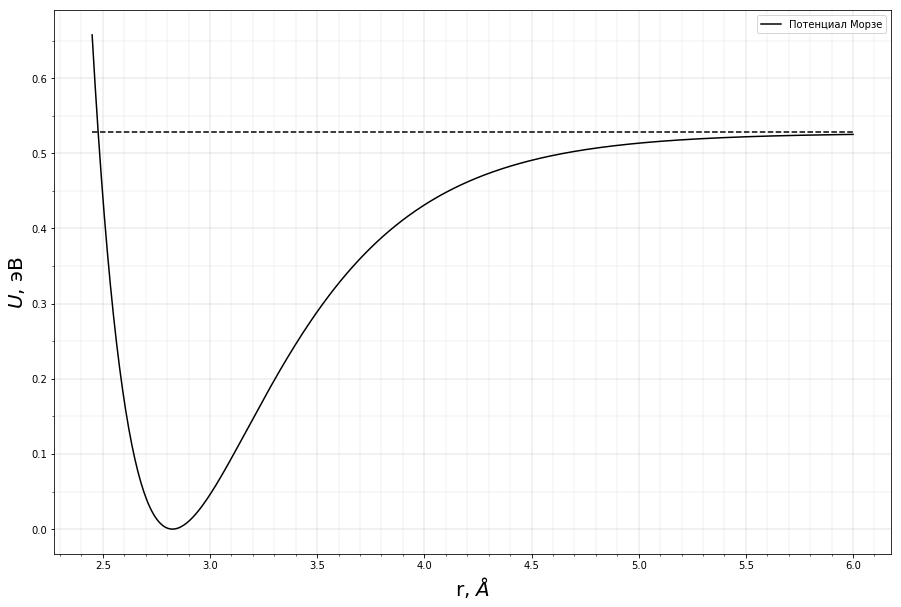

In [48]:
plt.plot(x,y, label='Потенциал Морзе', c='black')
plt.plot(x, y_d, color='k', linestyle='--')
plt.legend()

xminorLocator = MultipleLocator(.1)
yminorLocator = MultipleLocator(.05)
plt.gca().xaxis.set_minor_locator(xminorLocator)
plt.gca().yaxis.set_minor_locator(yminorLocator)
plt.grid(which='major', c='grey', lw=0.1)
plt.grid(which='minor', c='grey', lw=0.1)

plt.xlabel(r'r, $\AA$',size=20)
plt.ylabel(r'$U$, эВ',size=20)
plt.savefig('morse.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

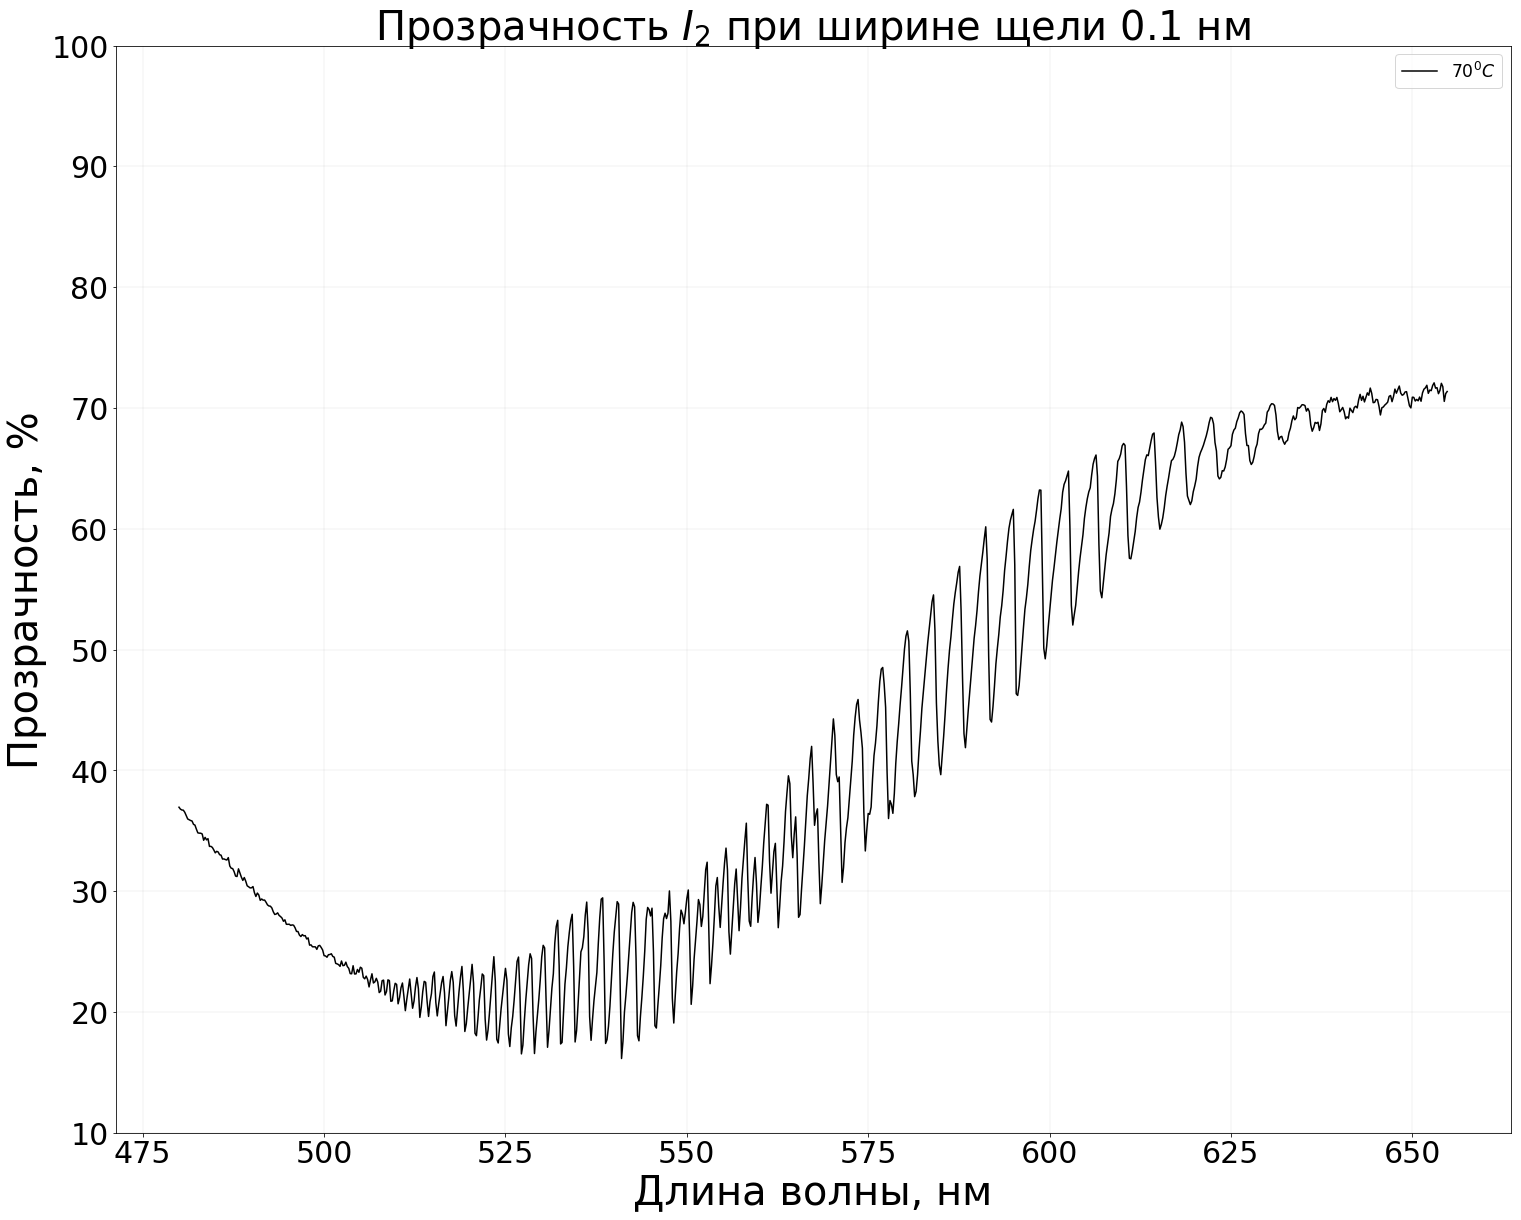

In [49]:
df = get_spectrum('70C_slot0_1nm.dat')
fig = plt.figure()
ax = plt.subplot(111)
df.plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='70$^0C$', c='black')
ax.set_xlabel('Длина волны, нм', size=40)
ax.set_ylabel('Прозрачность, %', size=40)
ax.set_title("Прозрачность $I_2$ при ширине щели $0.1$ нм", size=40)
#ax.axvline(x=559.5, linewidth=1, ymin=0.05, ymax=0.95, linestyle='-', color='r', label='Граница изменения \n начального колебательного\n уровня c $v^{\prime\prime}=1$ на $v^{\prime\prime}=0$')


ax.set_ylim(10,100)

plt.grid(which='major', ls='-', lw=0.1, c='grey')
plt.grid(which='minor', ls='--', lw=0.05, c='grey')
ax.legend(fontsize='xx-large')

ax.tick_params(labelsize=30)

peaks_len = len(peaks)
fig.set_size_inches(25, 20)
fig.savefig('absorption_spectrum_slit_01.pdf', bbox_inches='tight', pad_inches=0)

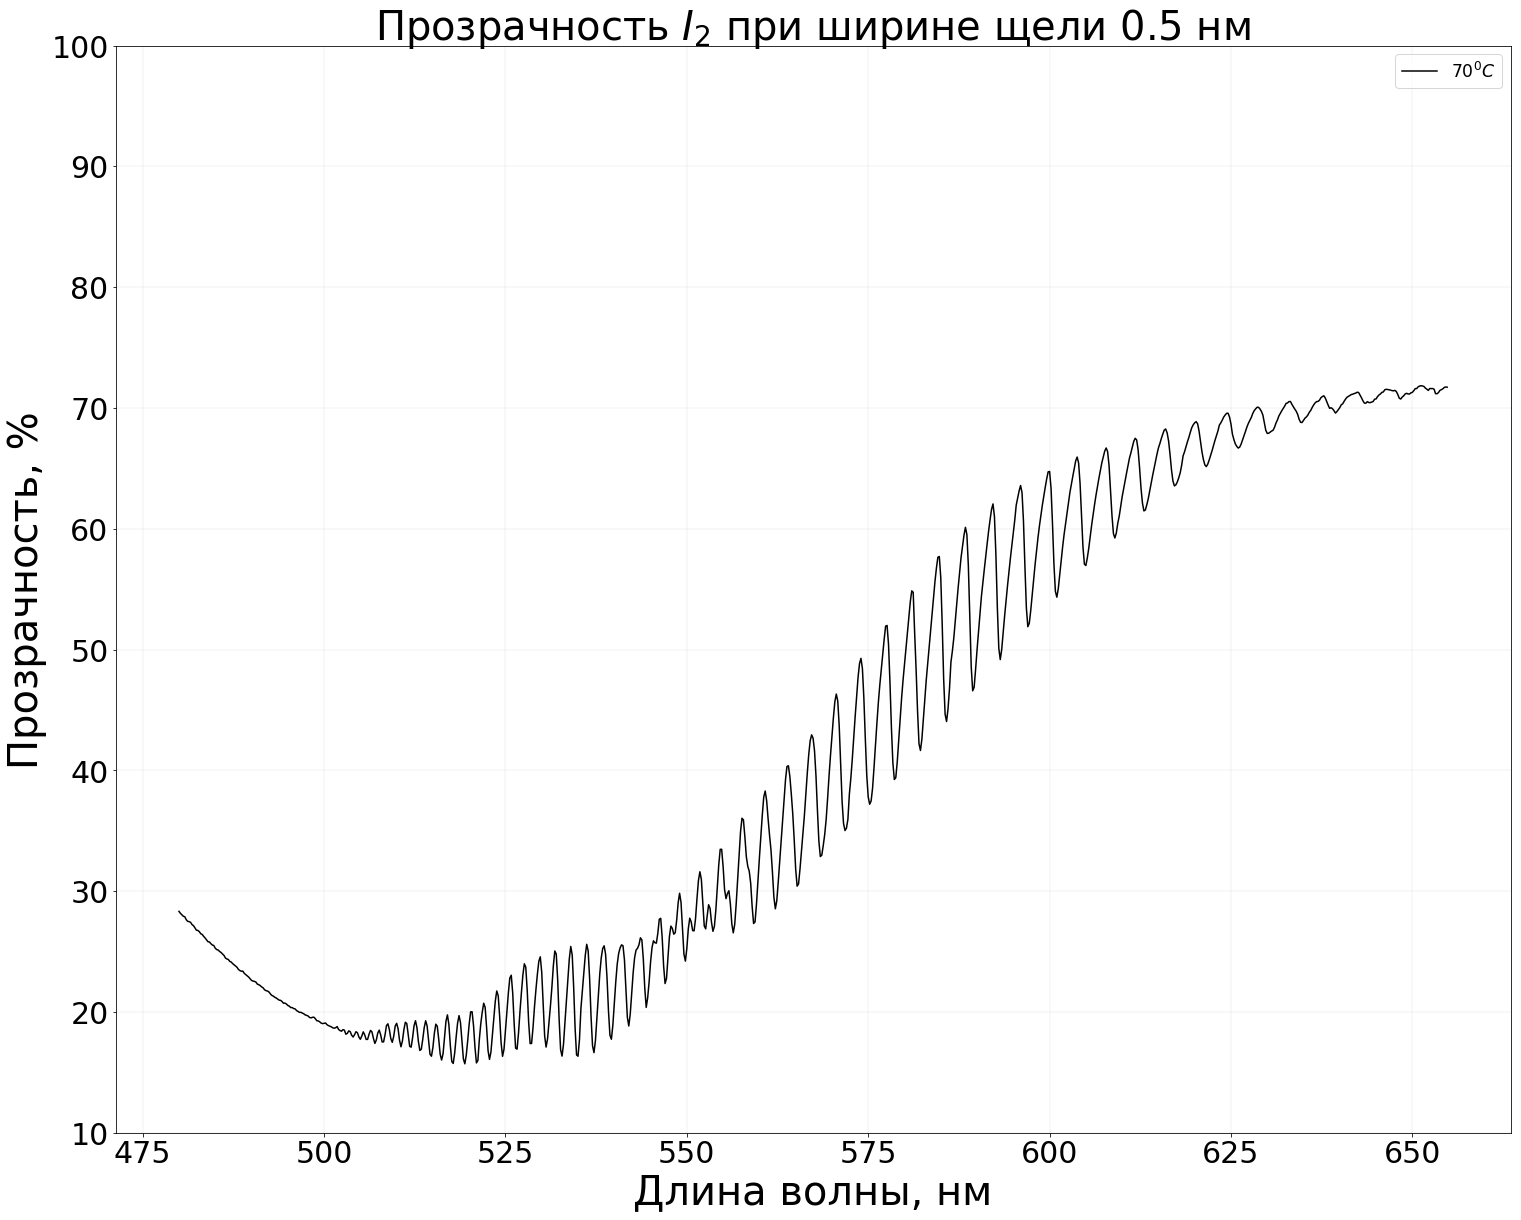

In [50]:
df = get_spectrum('70C_slot0_5nm.dat')
fig = plt.figure()
ax = plt.subplot(111)
df.plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='70$^0C$', c='black')
ax.set_xlabel('Длина волны, нм', size=40)
ax.set_ylabel('Прозрачность, %', size=40)
ax.set_title("Прозрачность $I_2$ при ширине щели $0.5$ нм", size=40)
#ax.axvline(x=559.5, linewidth=1, ymin=0.05, ymax=0.95, linestyle='-', color='r', label='Граница изменения \n начального колебательного\n уровня c $v^{\prime\prime}=1$ на $v^{\prime\prime}=0$')

ax.set_ylim(10,100)

plt.grid(which='major', ls='-', lw=0.1, c='grey')
plt.grid(which='minor', ls='--', lw=0.05, c='grey')
ax.legend(fontsize='xx-large')

ax.tick_params(labelsize=30)

peaks_len = len(peaks)
fig.set_size_inches(25, 20)
fig.savefig('absorption_spectrum_slit_05.pdf', bbox_inches='tight', pad_inches=0)

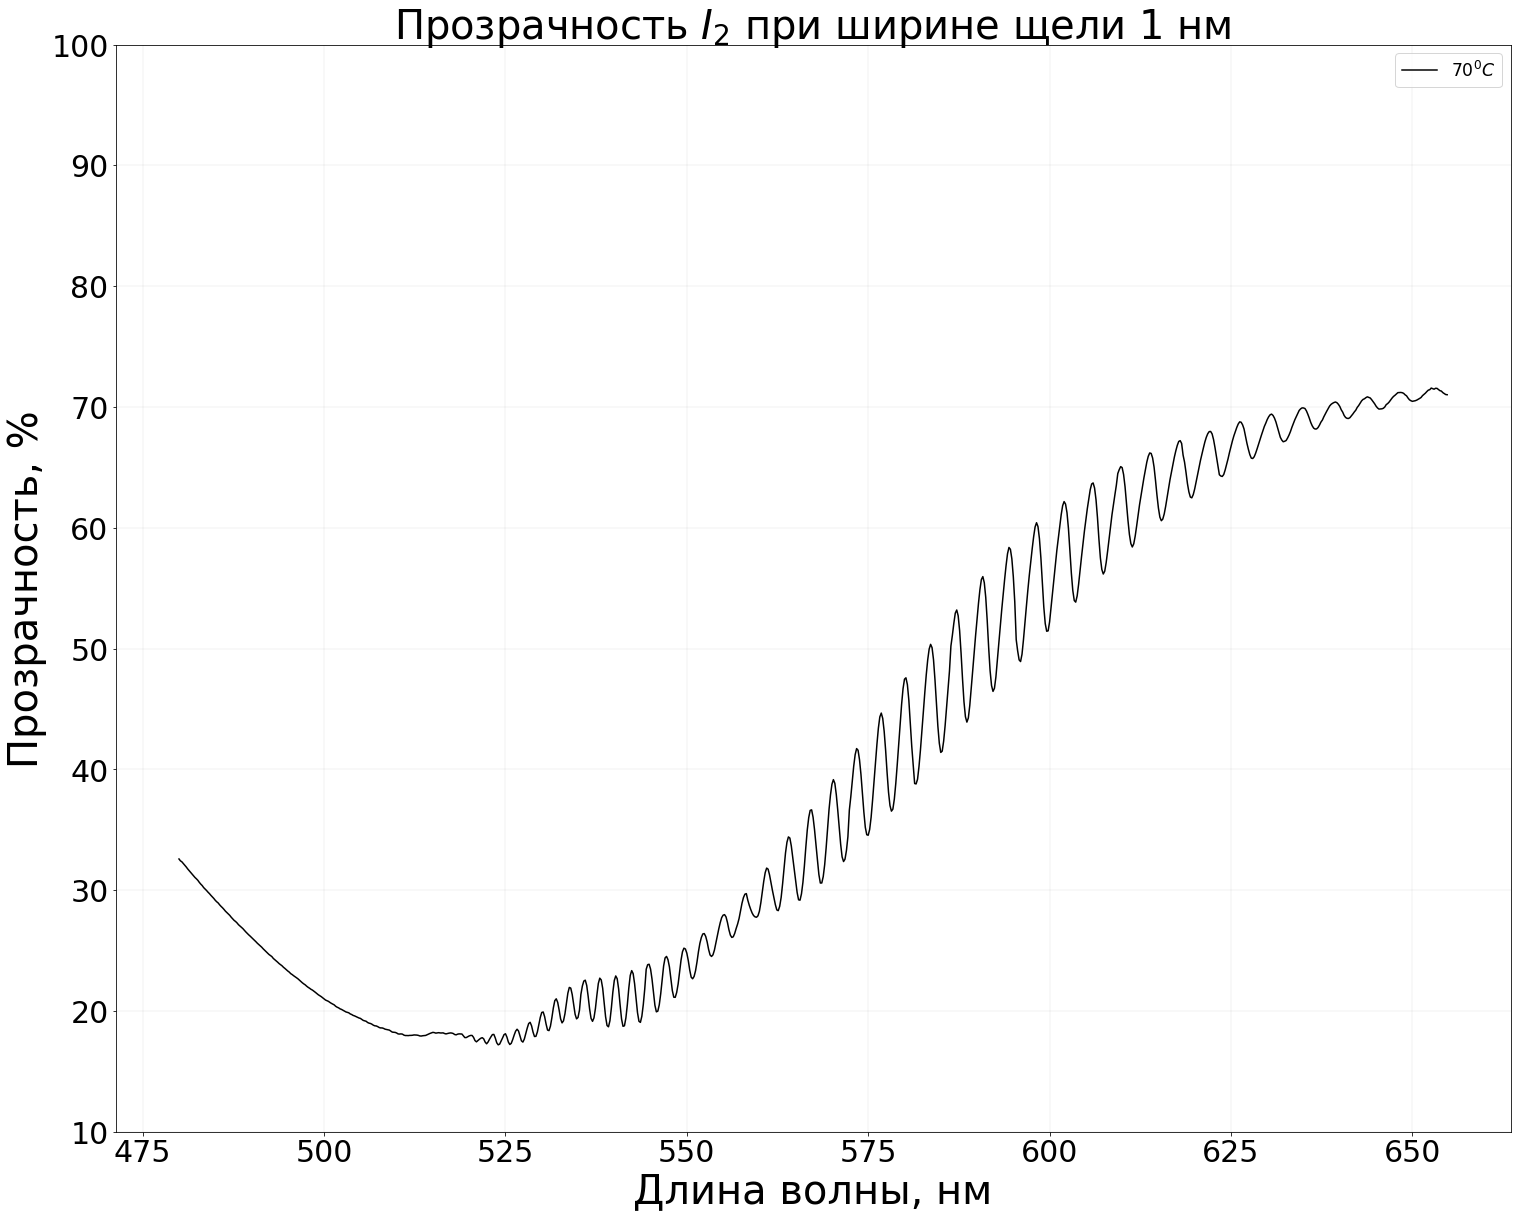

In [51]:
df = get_spectrum('70C_slot1nm.dat')
fig = plt.figure()
ax = plt.subplot(111)
df.plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='70$^0C$', c='black')
ax.set_xlabel('Длина волны, нм', size=40)
ax.set_ylabel('Прозрачность, %', size=40)
ax.set_title("Прозрачность $I_2$ при ширине щели $1$ нм", size=40)
#ax.axvline(x=559.5, linewidth=1, ymin=0.05, ymax=0.95, linestyle='-', color='r', label='Граница изменения \n начального колебательного\n уровня c $v^{\prime\prime}=1$ на $v^{\prime\prime}=0$')

ax.set_ylim(10,100)

plt.grid(which='major', ls='-', lw=0.1, c='grey')
plt.grid(which='minor', ls='--', lw=0.05, c='grey')
ax.legend(fontsize='xx-large')

ax.tick_params(labelsize=30)

peaks_len = len(peaks)
fig.set_size_inches(25, 20)
fig.savefig('absorption_spectrum_slit_1.pdf', bbox_inches='tight', pad_inches=0)

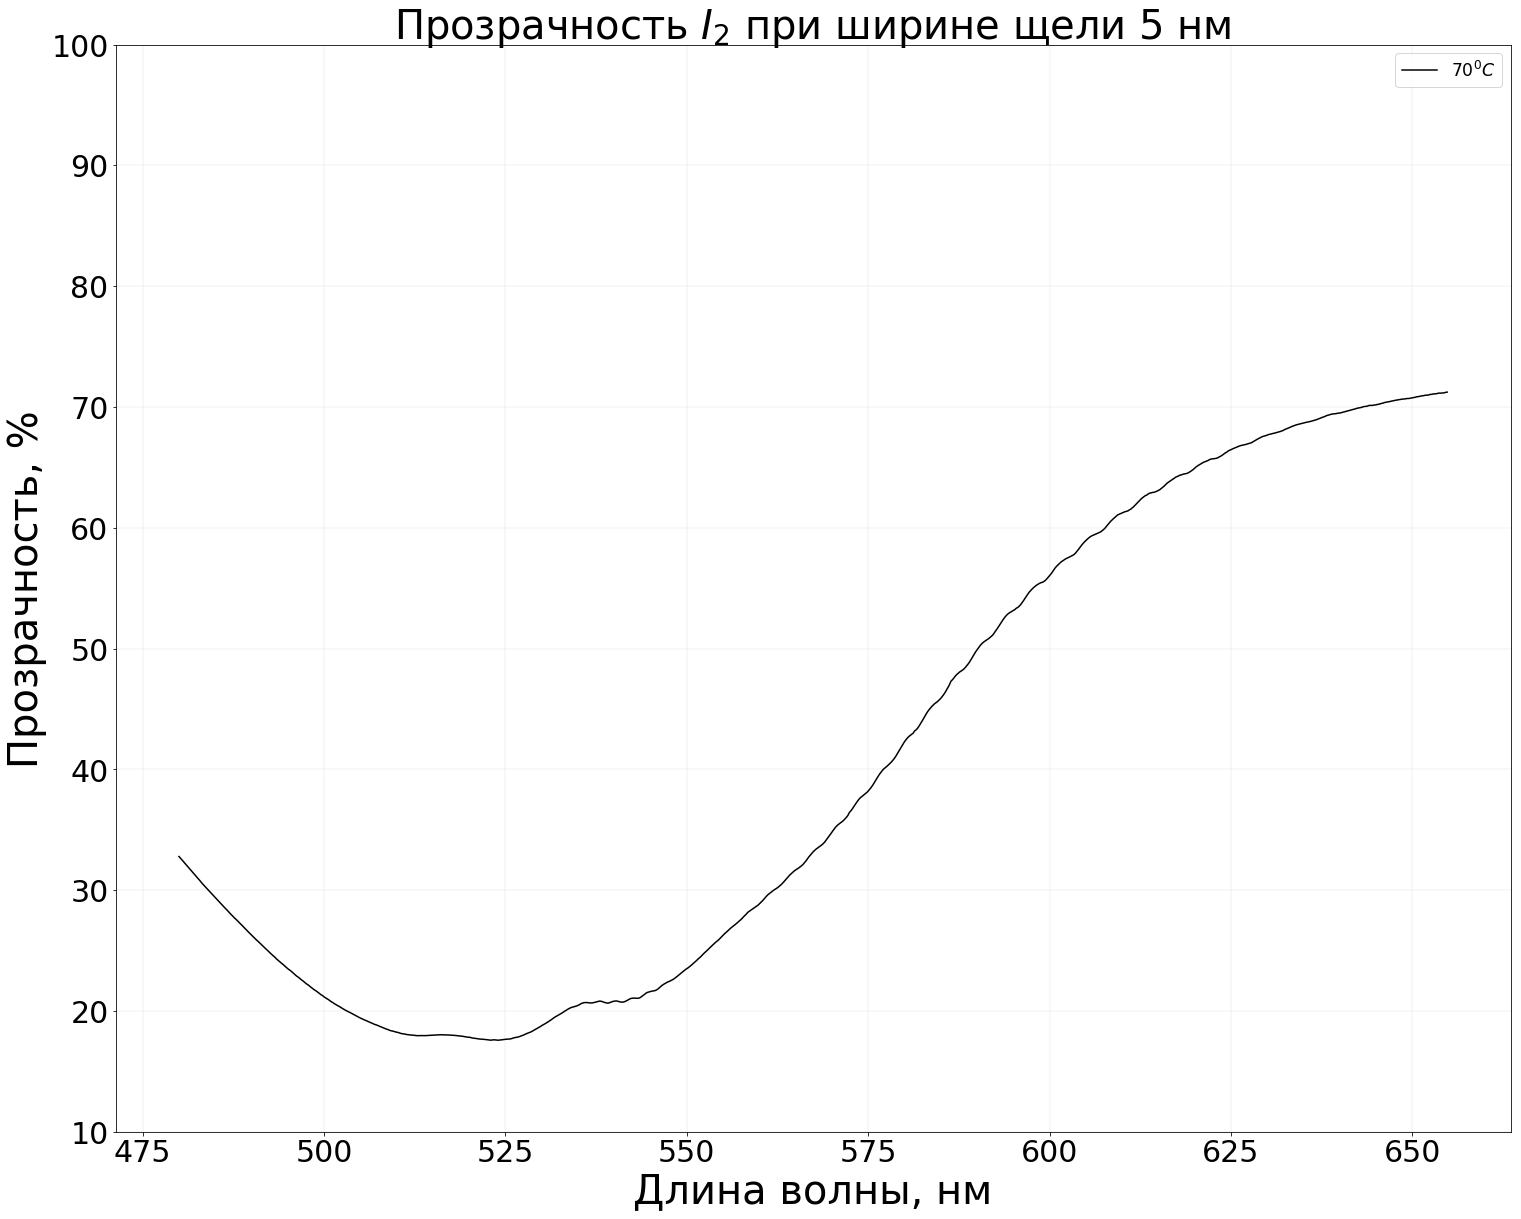

In [52]:


df = get_spectrum('70C_slot5nm.dat')
fig = plt.figure()
ax = plt.subplot(111)
df.plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='70$^0C$', c='black')
ax.set_xlabel('Длина волны, нм', size=40)
ax.set_ylabel('Прозрачность, %', size=40)
ax.set_title("Прозрачность $I_2$ при ширине щели $5$ нм", size=40)
#ax.axvline(x=559.5, linewidth=1, ymin=0.05, ymax=0.95, linestyle='-', color='r', label='Граница изменения \n начального колебательного\n уровня c $v^{\prime\prime}=1$ на $v^{\prime\prime}=0$')

ax.set_ylim(10,100)

plt.grid(which='major', ls='-', lw=0.1, c='grey')
plt.grid(which='minor', ls='--', lw=0.05, c='grey')
ax.legend(fontsize='xx-large')

ax.tick_params(labelsize=30)

peaks_len = len(peaks)
fig.set_size_inches(25, 20)
fig.savefig('absorption_spectrum_slit_5.pdf', bbox_inches='tight', pad_inches=0)